In [1]:
%matplotlib inline
import uproot
import numpy as np
import matplotlib.pyplot as plt
from hist import intervals

In [51]:
class Efficiency:
    def __init__(self, num, denom, coverage=0.683):
        self.efficiency = num.values() / denom.values()
        self.lower_bound, self.upper_bound = intervals.clopper_pearson_interval(
            num.values(), denom.values(), coverage)
        self.low_error = self.efficiency - self.lower_bound
        self.high_error = self.upper_bound - self.efficiency

        self.num = num
        self.denom = denom
    
    @property
    def x_axis(self):
        return self.denom.axes[0]
    
    @property
    def bin_centers(self):
        return self.x_axis.centers()
    
    @property
    def bin_widths(self):
        return self.x_axis.widths()

    @property
    def value(self):
        return self.efficiency

    @property
    def x(self):
        return self.bin_centers

    @property
    def error(self):
        return [self.low_error, self.high_error]

    @classmethod
    def from_data(cls, data, selection, h_args, is_reg=True, coverage=0.683):
        constructor = Hist.new.Reg if is_reg else Hist.new.Var
        denom = constructor(*h_args).Int64()
        num = constructor(*h_args).Int64()
        denom.fill(data)
        num.fill(data[selection])
        return cls(num, denom)

    def plot(self, ax=None, yerr=True, xerr=False, **kwargs):
        if ax is None:
            ax = plt.gca()

        yerr = self.error if yerr else None
        xerr = self.bin_widths if xerr else None

        return ax.errorbar(x=self.x, y=self.value, yerr=yerr, xerr=xerr, **kwargs)


In [52]:
path = './DQM_V0001_R000000001__Global__CMSSW_X_Y_Z__RECO.root'

In [53]:
root_file = uproot.open(path)

In [54]:
gem_dir = root_file['DQMData/Run 1/GEM/Run summary']
eff_dir = gem_dir['Efficiency']

In [62]:
type1_dir = eff_dir['type1/Efficiency']
type2_dir = eff_dir['type2/Efficiency']

<ErrorbarContainer object of 3 artists>

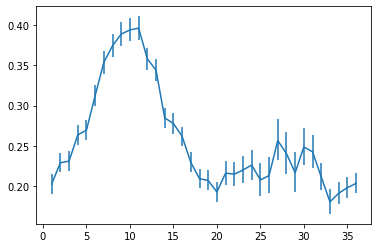

In [63]:
eff = Efficiency(type1_dir['chamber_GE11-M-L1_matched'], type1_dir['chamber_GE11-M-L1'])
eff.plot()

<ErrorbarContainer object of 3 artists>

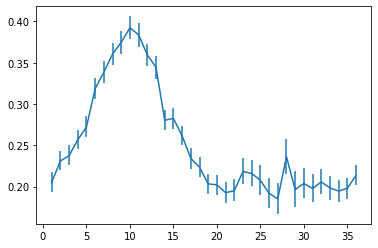

In [64]:
eff = Efficiency(type2_dir['chamber_GE11-M-L1_matched'], type2_dir['chamber_GE11-M-L1'])
eff.plot()